In [50]:
# Import relevant libraries and modules.

import numpy as np
import pandas as pd
import matplotlib as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

from xgboost import XGBClassifier
from xgboost import plot_importance

In [51]:
cog_data_arms1 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_fluid_ARMS1_merged.csv")

In [52]:
cog_data_arms1.head()

,src_subject_id.baseline_year_1_arm_1.x,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,101,100,86,103,106,81,98.0,102.0,99.0,4
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,92,107,103,95,119,110,104.0,119.0,114.0,4
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,116,145,90,117,116,85,127.0,90.0,110.0,1
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,74,93,94,103,99,110,88.0,101.0,93.0,2
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,88,82,81,56,116,85,75.0,90.0,79.0,3


In [53]:
cog_data_arms1.dtypes

src_subject_id.baseline_year_1_arm_1.x                   object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
sex.baseline_year_1_arm_1.x                              object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1        int64
nihtbx_flanker_agecorrected.baseline_yea

In [54]:
#convert sex variable to numerical dummy
cog_data_arms1_dummies = pd.get_dummies(cog_data_arms1, columns=['sex.baseline_year_1_arm_1.x'])
cog_data_arms1_dummies.head()
cog_data_arms1_dummies.dtypes

src_subject_id.baseline_year_1_arm_1.x                   object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1        int64
nihtbx_flanker_agecorrected.baseline_year_1_arm_1         int64
nihtbx_list_agecorrected.baseline_year_1

In [55]:
value_counts = cog_data_arms1['community'].value_counts()
print(value_counts)

community
1     920
2     537
3     500
4     274
5     256
6     244
7     235
8     183
9     123
10      8
Name: count, dtype: int64


In [56]:
def remove_small_communities(df, community_column, threshold=100):
    community_counts = df[community_column].value_counts()
    mask = df[community_column].isin(community_counts[community_counts >= threshold].index)
    filtered_df = df[mask]
    return filtered_df

cog_data_arms1_filtered = remove_small_communities(cog_data_arms1, 'community')
value_counts = cog_data_arms1_filtered['community'].value_counts()
print(value_counts)

community
1    920
2    537
3    500
4    274
5    256
6    244
7    235
8    183
9    123
Name: count, dtype: int64


In [57]:
cog_data_arms1_filtered.head()

,src_subject_id.baseline_year_1_arm_1.x,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,101,100,86,103,106,81,98.0,102.0,99.0,4
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,92,107,103,95,119,110,104.0,119.0,114.0,4
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,116,145,90,117,116,85,127.0,90.0,110.0,1
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,74,93,94,103,99,110,88.0,101.0,93.0,2
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,88,82,81,56,116,85,75.0,90.0,79.0,3


In [58]:
#define target variable
y = cog_data_arms1_filtered['community'] - 1 #y may need to be subtracted by 1 to avoid error?

#define predictor variables, drop tempermant metrics
X = cog_data_arms1_filtered.drop(['community',
                         'src_subject_id.baseline_year_1_arm_1.x',
                         'X',
                         'dataset_id.baseline_year_1_arm_1.x',
                         'interview_age.baseline_year_1_arm_1.x',
                         'sex.baseline_year_1_arm_1.x',
                         'nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1'], axis = 1)

y.value_counts()

community
0    920
1    537
2    500
3    274
4    256
5    244
6    235
7    183
8    123
Name: count, dtype: int64

In [59]:
X.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1        int64
nihtbx_flanker_agecorrected.baseline_year_1_arm_1         int64
nihtbx_list_agecorrected.baseline_year_1_arm_1            int64
nihtbx_cardsort_agecorrected.baseline_year_1_arm_1        int64
nihtbx_pattern_agecorrected.baseline_year_1_arm_1         int64
nihtbx_picture_agecorrected.baseline_year_1_arm_1         int64
nihtbx_reading_agecorrected.baseline_yea

In [60]:
X.head()

,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,upps_y_ss_positive_urgency.baseline_year_1_arm_1,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,upps_y_ss_sensation_seeking.baseline_year_1_arm_1,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1
0,9,2,6,2,10,7,11,7,10,122,101,100,86,103,106,81,102.0,99.0
1,5,1,1,6,6,8,11,6,10,122,92,107,103,95,119,110,119.0,114.0
2,6,2,5,11,8,8,7,11,6,98,116,145,90,117,116,85,90.0,110.0
3,13,4,7,4,12,11,12,6,7,92,74,93,94,103,99,110,101.0,93.0
4,12,3,6,2,5,4,6,11,5,98,88,82,81,56,116,85,90.0,79.0


In [61]:
#split data into train and test 75/25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [62]:
#define custom scorers with appropriate 'average' parameter
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')

In [63]:
#setting XGBoost to do multiclass classification using the softprob objective. From XGBoost documentation: 
# "same as softmax, but output a vector of ndata * nclass, which can be further reshaped to ndata * nclass matrix. 
# The result contains predicted probability of each data point belonging to each class."
xgb = XGBClassifier(objective='multi:softprob', random_state=0, num_class=9)

In [64]:
#defining parameters for tuning as cv_params

cv_params = {'max_depth': [4, 6], # the maximum depth of each decision tree within the XGBoost model. Tuning process will try trees with max depth of 4 and 6. Deeper trees can capture more complex patters but prone to overfitting
              'min_child_weight': [3, 5], # the minimum sum of instance weight needed in a child node to continue splitting. higher values can help prevent overfitting by pruning more branches from decision trees 
              'learning_rate': [0.1, 0.2, 0.3], # the step size shrinkage used in each boosting iteration. lower values tend to require more trees (iterations) but can improve the models performance
              'n_estimators': [5,10,15], # specifies the number of decision trees to be built. more trees = capture more complex patterns, too many trees = overfitting
              'subsample': [0.7], # during tuning, 70% of training instances (rows) will be randomly sampled for growing each tree. can help reduce overfitting
              'colsample_bytree': [0.7] # during tuning, 70% of freatures (columns) will be randomly sampled for growing each tree. can help reduce overfitting
              }

In [65]:
#defining evaluation criteria as scoring
scoring = {
    'accuracy': 'accuracy', 
    'precision': precision_scorer,
    'recall': recall_scorer, 
    'f1': f1_scorer
}
#accuracy = number of correct predictions / total number of predictions
#precision = #measures the proportion of true positives among both the true and false positives (predicted positives)
#recall = #measures the proportion of true positives among the relevant elements (true positives & false negatives)
#f1 = gives more weight to false negatives and false positives. 2 * precision * recall / precision + recall

In [66]:
#utilizing GridSearchCV to find optimal parameter values
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, 
                      cv = 10, 
                      refit = 'f1')

In [67]:
#fitting gridsearch model optimal params to training data
#TODO: iterate 100 times, calculate a confidence interval for accuracy metric that results each time
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1',
             scoring={'accuracy': 'accuracy',
                      'f1': make_scorer(f1_score, response_method='predict', average=weighted),
                      'precision': make_scorer(precision_score, response_method='predict', average=weighted),
                      'recall': make_scorer(recall_score, response_method='predict', average=weighted)})

In [68]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

In [69]:
pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

In [70]:
y_pred = xgb_cv.predict(X_test)

In [72]:
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

accuracy score: 0.988997555012225


In [78]:
pc_score = precision_score(y_test, y_pred, average='weighted')
print('precision score:', pc_score)

precision score: 0.989174836765175


In [80]:
rc_score = metrics.recall_score(y_test, y_pred, average='weighted')
print('recall score:', rc_score)

recall score: 0.988997555012225


In [82]:
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print('f1 score:', f1_score)

f1 score: 0.9889253863586427


In [83]:
# the accuracy of this model was 98.9% accurate
# the model shows a precision score of 0.989, indicating that the model is very good at predicting true positives
# this means that the model correctly classifies which community a participant belongs to based off of cognitive profiles
# the recall score is 0.989 and the f1 score is 0.989

In [84]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [85]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

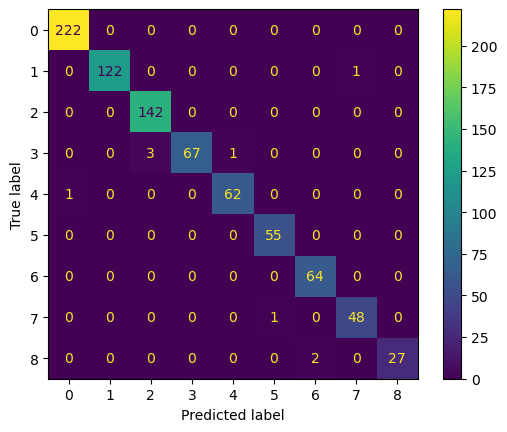

In [86]:
disp.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

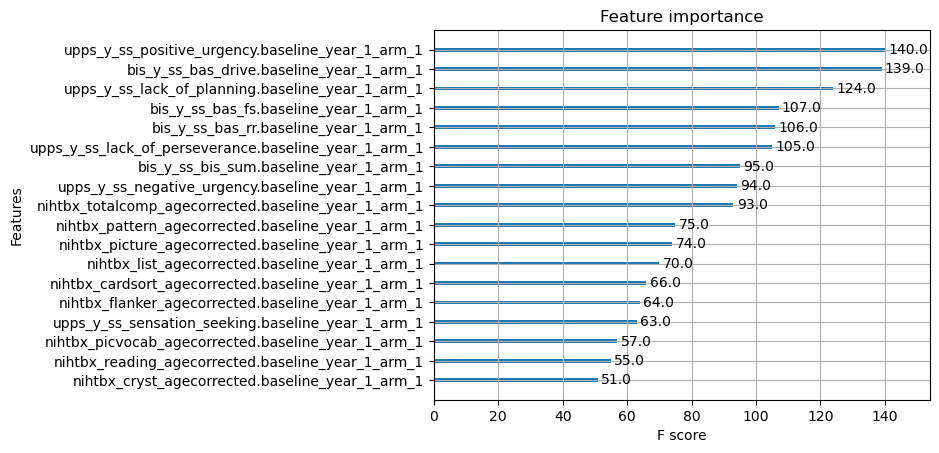

In [87]:
plot_importance(xgb_cv.best_estimator_)